
# Introduction to data analysis using pandas


Pandas is a popular open source Python package for data science, data engineering, analytics, and machine learning.

This notebook will give you a gentle introduction to pandas, but the exercises have been deisgned to allow you to complete them in multiple ways so feel free to google and find different functions. For more helpful documentation, check out these resources:

## Completely new to coding?

*   If you are new to google colab you can [watch an introduction to it here.](https://www.youtube.com/watch?v=inN8seMm7UI)
*   If you have never used python before [you can read an introduction to the language here](https://www.w3schools.com/python/python_intro.asp)

### New to pandas?

*   Introduction to Pandas in colab: https://colab.google/articles/pandas  
*   Pandas documentation introduction: https://pandas.pydata.org/docs/user_guide/10min.html







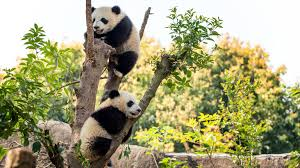


In [1]:
import pandas as pd

# Data we are using for analysis

This data is from the NSHBSA Open Data Portal, and is called the 'Prescription Cost analysis' dataset.

https://opendata.nhsbsa.net/dataset/prescription-cost-analysis-pca-monthly-data

This data is open source, which means:

- We can share it openly
- It has no security concerns

This is a monthly dataset that describes how many medicines were prescribed across all GP Practices in england, per NHS Region, and what they cost.
This is 'real data', so actually describes real anti-depressant prescribing in England.
We have merged, simplified and filtered all these monthly files into a single dataset.

The data is being read into this notebook using this github repo link below (do not delete).



In [2]:
! git clone https://github.com/nhsengland/Digdata

fatal: destination path 'Digdata' already exists and is not an empty directory.


### pca_regional_drug_summary_df

This dataset now contains 6 columns:


*   *YEAR*: The year in the format YYYY. There are 4 years-worth of prescribing information in the dataset.
*   *YEAR_MONTH*: The year and month, in the format YYYYMM, where 202401 is the same as January 2024. There are 46 year-month values in the data.
*   *REGION*: The NHS Region. There are 7 regions in the data.
*   *DRUG*: The name of the anti-depressant medicine. There are 32 of these in the data.
*   *ITEMS*: How many items were prescribed.
*   *COST*: The combined cost for all those items.

In a sentence we could describe this dataset as:

- Per English NHS Region and per year-month, the volume and cost of each antidepressant drug prescribed.

And what we are going to do with this data is:

- Understand national and regional prescribing volumes and costs
- Understand national and regional prescribing trends
- Understand monthly and annual trends
- And finally, maybe even predict future monthly anti-depressant prescribing volumes


In [3]:
pca_regional_drug_summary_df = pd.read_csv('BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

display(pca_regional_drug_summary_df)

,YEAR,YEAR_MONTH,REGION_NAME,BNF_CHEMICAL_SUBSTANCE,ITEMS,COST
0,2021,202101,EAST OF ENGLAND,Agomelatine,183,7405.37
1,2021,202101,LONDON,Agomelatine,411,18227.63
2,2021,202101,MIDLANDS,Agomelatine,252,12344.56
3,2021,202101,NORTH EAST AND YORKSHIRE,Agomelatine,366,11183.06
4,2021,202101,NORTH WEST,Agomelatine,119,4783.72
...,...,...,...,...,...,...
9450,2024,202410,MIDLANDS,Vortioxetine,5989,149309.82
9451,2024,202410,NORTH EAST AND YORKSHIRE,Vortioxetine,6687,139779.09
9452,2024,202410,NORTH WEST,Vortioxetine,5430,124510.32
9453,2024,202410,SOUTH EAST,Vortioxetine,7018,178709.85


### pca_regional_summary_df

So we can see that the original data differs in a few ways:

- It only contains antidepressant drugs
- It doesn't contain BNF Chapter and BNF Section information

The BNF stands for the *British National Formulary*.
The BNF is structured hierarchically into Chapters, Sections and Chemical Substances (Drugs).

For example:

- Amitriptyline hydrochloride is an actual antidepressant *DRUG*
- Amitriptyline hydrochloride is one of many *DRUG* within the 'Antidepressant drugs' *BNF_SECTION*
- Antidepressant drugs is one of many *BNF_SECTION* within the '04: Central Nervous System' *BNF_CHAPTER*
- And there are 23 *BNF_CHAPTER* (although very little prescribing stems from some of the chapters)

In summary, BNF chapters are split into sections, which are then split into actual drugs (i.e. a hierarchy).

In [4]:
pca_regional_summary_df = pd.read_csv('BSA_ODP_PCA_REGIONAL_SUMMARY.csv')

display(pca_regional_summary_df)

,YEAR_MONTH,REGION_NAME,ITEMS,COST
0,202101,EAST OF ENGLAND,796466,3406002.61
1,202101,LONDON,678021,3205663.66
2,202101,MIDLANDS,1249416,5698605.43
3,202101,NORTH EAST AND YORKSHIRE,1428677,5741978.96
4,202101,NORTH WEST,1003963,4435228.70
...,...,...,...,...
317,202410,MIDLANDS,1515794,3650020.71
318,202410,NORTH EAST AND YORKSHIRE,1845998,3766629.55
319,202410,NORTH WEST,1196871,2687352.76
320,202410,SOUTH EAST,972188,2852364.46


# Part 1 Pandas introduction: Transforming and Aggregating Data

#### Printing data

There are a few methods you can use to view your dataframe, given the name df:


```python
# shows you the top 5 rows of a dataframe
df.head(5)

# this displays your dataframe
display(df)

# this displays the datatype of each column
df.info()

# this prints a list of columns in the df
df.columns
```

#### Selecting data

To view only one, or multiple columns in the dataframe, use the following syntax:

```python
#this will display a single column, 'prescription_count'
df['prescription_count']

#this will display both 'prescription_count' and 'gp_practice'. Remember to use double brackets to view multiple columns!
df[['prescription_count', 'gp_practice']]



#### Aggregating data

To read more:

*   [grouby documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

*   [sort_values documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)



```python
# this calculates the total number stored in 'prescription_count', so the total count of prescriptions
df['prescription_count'].sum()

# this calculates the total number of prescriptions, grouped by GP practice
df.groupby('gp_practice', as_index=False)['prescription_count'].sum()

# this sorts the values of the df by the values in column 'cost' from low to high
df.sort_values(by=['cost'])



#### Filtering data

To read more:


*   [Filtering to a column value](https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/)
*   [Using the query method](https://www.w3schools.com/python/pandas/ref_df_query.asp)



```python

# this filters to a specific value within a column, in this instance where the year is 2023
df[df['year']==2023]

# this filters to where drug counts are greater than 100
df[df['drug_count']>100]

# this also filters to where drug counts are greater than 100
df.query('drug_count > 100')


## Part 1: Transforming and Aggregating Data Exercises

### Question 1: Nationally, calculate the top 10 prescribed anti-depressants across the whole time frame, sorted from biggest from smallest.

In [5]:
pca_regional_drug_summary_df.groupby('BNF_CHEMICAL_SUBSTANCE', as_index=False)['ITEMS'].sum().sort_values(by='ITEMS', ascending=False).head(10)

,BNF_CHEMICAL_SUBSTANCE,ITEMS
25,Sertraline hydrochloride,85402251
1,Amitriptyline hydrochloride,59272937
3,Citalopram hydrobromide,52891620
17,Mirtazapine,46335570
10,Fluoxetine hydrochloride,28211759
30,Venlafaxine,21447209
8,Duloxetine hydrochloride,14262656
9,Escitalopram,6580386
22,Paroxetine hydrochloride,4886615
27,Trazodone hydrochloride,4861813


### Question 2: Calculate the monthly national cost of Mirtazapine prescribing

In [6]:
pca_regional_drug_summary_df[pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'] == 'Mirtazapine'].groupby('YEAR_MONTH', as_index=False)['COST'].sum()

,YEAR_MONTH,COST
0,202101,2380030.90
1,202102,2249220.63
2,202103,2523008.14
3,202104,2039348.02
4,202105,1935629.32
5,202106,2055820.88
6,202107,1609248.23
7,202108,1539582.17
8,202109,1621383.70
9,202110,1356643.04


### Question 3: What is the annual spend of Sertraline hydrochloride prescribing in the Midlands region?

In [7]:
pca_regional_drug_summary_df[(pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'] == 'Sertraline hydrochloride') & (pca_regional_drug_summary_df['REGION_NAME'] == 'MIDLANDS')].groupby('YEAR', as_index=False)['COST'].sum()

,YEAR,COST
0,2021,17477276.46
1,2022,6433863.59
2,2023,7600322.04
3,2024,8094889.16


# Part 2: Data Visualisation

Visualising is an important tool in both analytics and data science.

Visualising data can help us better understand data and see trends in data, amongst other things.

There are several packages which you can explore through these links here:

*   A good start point for data visualisations in pandas can be found here-  https://www.geeksforgeeks.org/pandas-built-in-data-visualization-ml/
*   Introduction to the python package matplotlib - https://www.geeksforgeeks.org/python-introduction-matplotlib/
*   Introduction to the python package seaborn - https://www.geeksforgeeks.org/introduction-to-seaborn-python/





## Part 2: Data Visualisation Exercises

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

### Question 1: Create a horizontal bar chart of the top 5 most prescribed drugs in 2024, arranged in order.

         BNF_CHEMICAL_SUBSTANCE     ITEMS
23     Sertraline hydrochloride  20289221
1   Amitriptyline hydrochloride  13453325
2       Citalopram hydrobromide  11156770
16                  Mirtazapine  10907989
9      Fluoxetine hydrochloride   6273887


C:\Users\MAKANI\AppData\Local\Temp\ipykernel_4652\1694098808.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0.5, 0, 'Items in Millions')

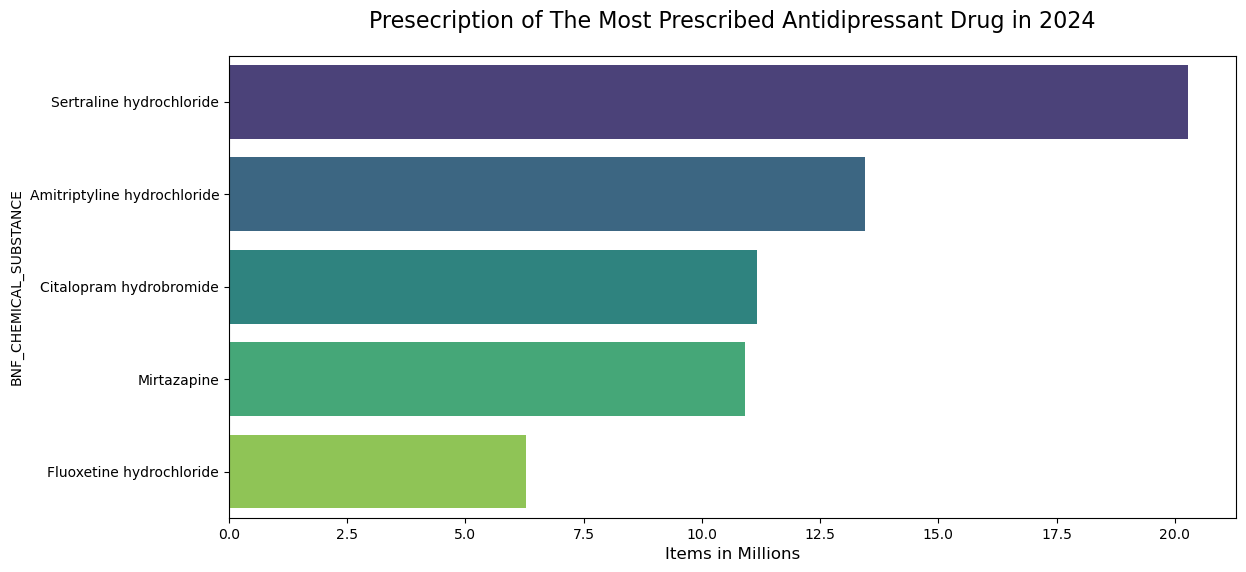

In [9]:
bar1_data = pca_regional_drug_summary_df[pca_regional_drug_summary_df['YEAR'] == 2024].groupby('BNF_CHEMICAL_SUBSTANCE', as_index=False)['ITEMS'].sum().sort_values(by='ITEMS', ascending=False).head(5)
print(bar1_data)
bar1_data['ITEMS_M'] = bar1_data['ITEMS'] / 1_000_000
plt.figure(figsize = (13,6))
sns.barplot(
    data=bar1_data,
    x='ITEMS_M',
    y='BNF_CHEMICAL_SUBSTANCE',
    palette='viridis'
);

plt.title('Presecription of The Most Prescribed Antidipressant Drug in 2024', fontsize=16, pad=20)
plt.xlabel('Items in Millions', fontsize=12)

### Question 2: Create a vertical bar chart showing the total annual cost of Sertraline hydrochloride prescribing in the NORTH WEST region.


C:\Users\MAKANI\AppData\Local\Temp\ipykernel_4652\700997215.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: xlabel='YEAR', ylabel='COST'>

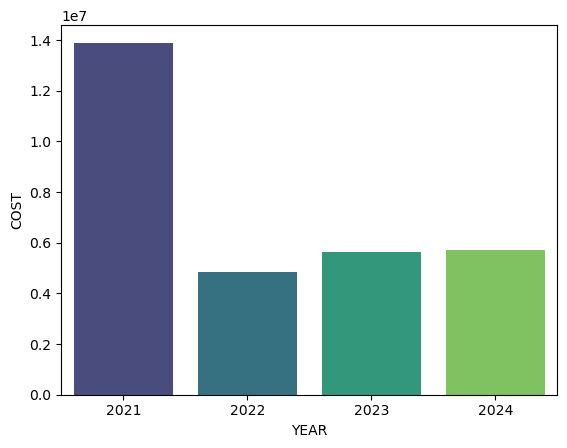

In [10]:
bar2_data = pca_regional_drug_summary_df[(pca_regional_drug_summary_df['REGION_NAME'] == 'NORTH WEST') & (pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'] == 'Sertraline hydrochloride')].groupby('YEAR', as_index=False)['COST'].sum()
sns.barplot(
    data=bar2_data,
    x='YEAR',
    y='COST',
    palette='viridis'
)









### Question 3: Create a line chart of the nationally monthly cost (rounded to the nearest pound) of escitalopram.

In [11]:
import matplotlib.pyplot as plt

<Axes: xlabel='YEAR_MONTH', ylabel='COST'>

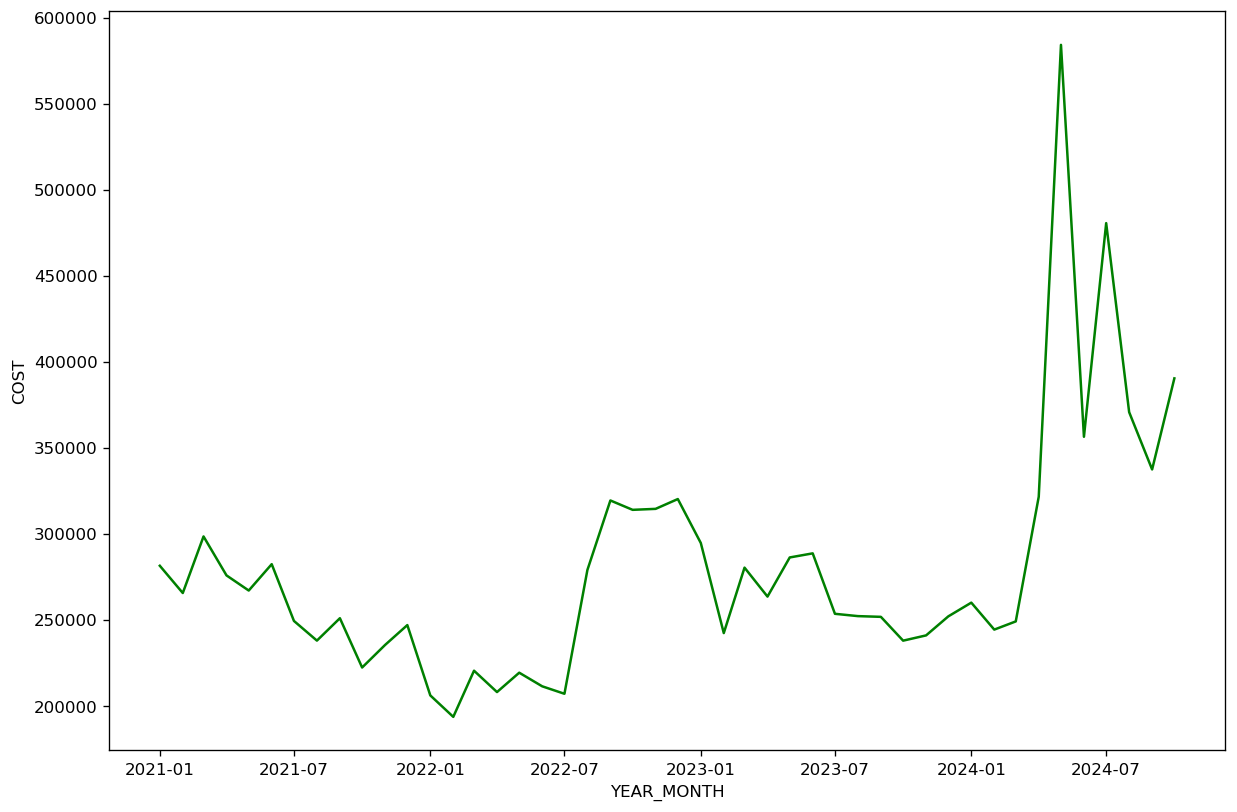

In [12]:
line_data = pca_regional_drug_summary_df[pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'] == 'Escitalopram'].groupby('YEAR_MONTH', as_index=False)['COST'].sum().round()
line_data['YEAR_MONTH'] = pd.to_datetime(line_data['YEAR_MONTH'], format='%Y%m')
plt.figure(figsize=(12, 8), dpi=120)
sns.lineplot(
    data=line_data,
    x='YEAR_MONTH',
    y='COST',
    color='g'
)

# Part 3: Data Metrics and Insights


#### Advanced analysis introduction


*   [Introduction to statistics in pandas](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html)
*   [Pivot tables](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)



```python
# this gives a summary of some descriptive statistics for the dataframe
df.describe()

# this will return the average number in the drug count field
df['drug_count'].mean()

# this will return the minimum value, the lowest observed value
df['drug_count'].min()

# this will return the maximum value, the highest observed value
df['drug_count'].max()

# this will pivot the df so each row represents a year, the columns are now the regions and the values are the summed count of the items within the column 'drug_count'
df.pivot_table(index='year', columns='region', values='drug_count', aggfunc=sum)  



## Part 3: Data Metrics and Insight Exercises

For these exercises, you will need to use the dataframe pca_regional_drug_summary_df




### Question 1: For context, create a monthly line chart showing total national prescribing cost

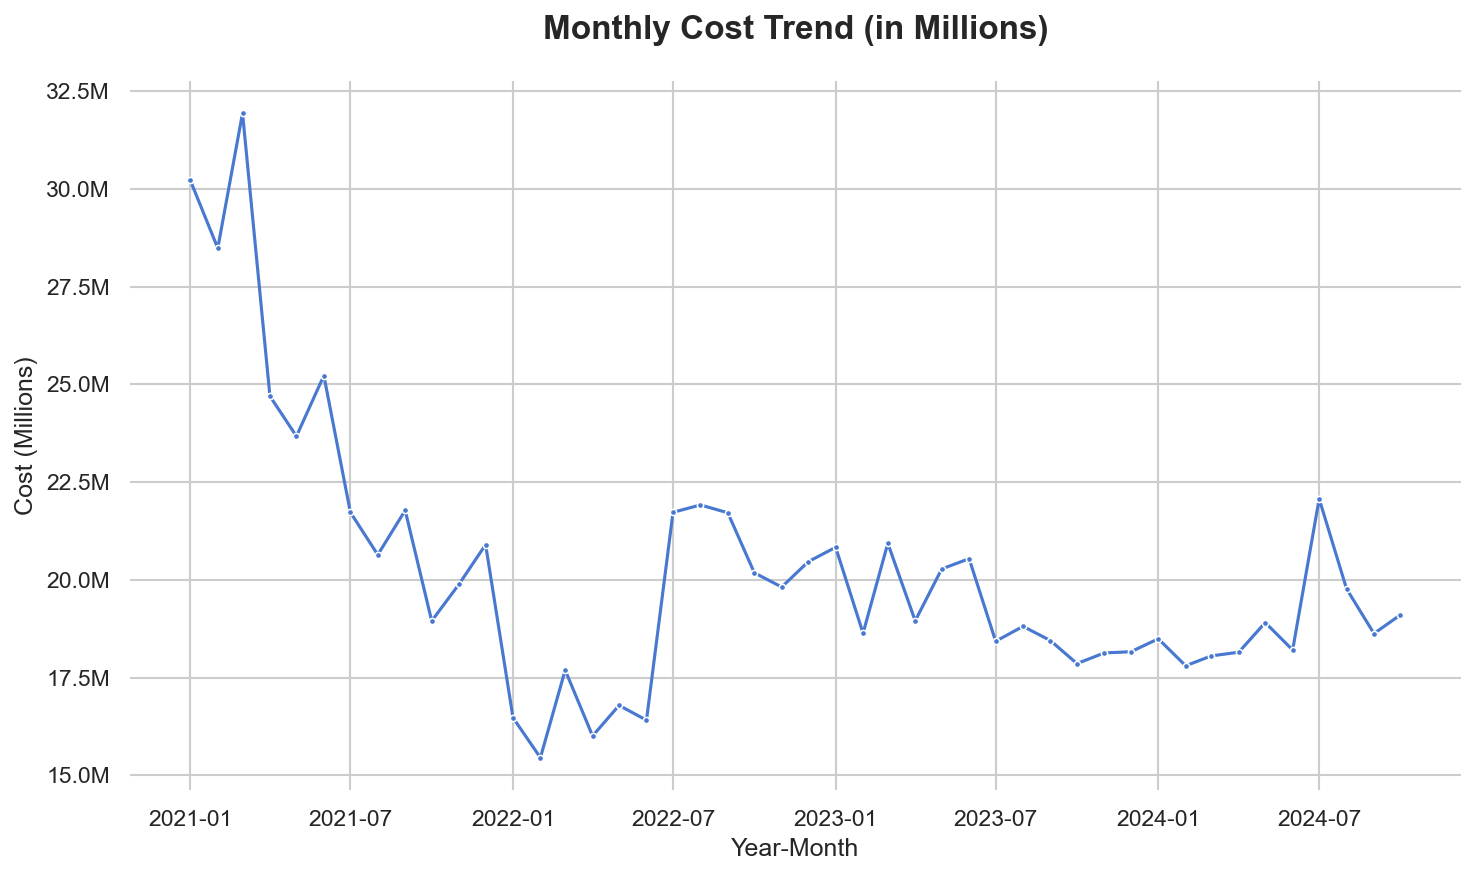

In [13]:
import matplotlib.ticker as ticker
line2 = pca_regional_drug_summary_df.groupby('YEAR_MONTH', as_index=False)['COST'].sum().round()
line2['YEAR_MONTH'] = pd.to_datetime(line2['YEAR_MONTH'], format='%Y%m')
sns.set_theme(style="whitegrid", palette="muted")
plt.figure(figsize=(10, 6), dpi=150)

line2['COST_M'] = line2['COST'] / 1_000_000

ax = sns.lineplot(
    data=line2,
    x='YEAR_MONTH',
    y='COST_M',
    linewidth=1.5,
    marker='o',
    markersize=3
)

plt.title('Monthly Cost Trend (in Millions)', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Cost (Millions)', fontsize=12)

ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1fM'))

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

In [14]:
pca_regional_drug_summary_df.head()

,YEAR,YEAR_MONTH,REGION_NAME,BNF_CHEMICAL_SUBSTANCE,ITEMS,COST
0,2021,202101,EAST OF ENGLAND,Agomelatine,183,7405.37
1,2021,202101,LONDON,Agomelatine,411,18227.63
2,2021,202101,MIDLANDS,Agomelatine,252,12344.56
3,2021,202101,NORTH EAST AND YORKSHIRE,Agomelatine,366,11183.06
4,2021,202101,NORTH WEST,Agomelatine,119,4783.72


### Question 2: Create *annual* summary statistics, for the min, Q1, median, Q3 and maximum national monthly prescribing cost (i.e. all drugs across all regions)


In [15]:
box_data = pca_regional_drug_summary_df.groupby(['YEAR', 'YEAR_MONTH'],as_index=False)['COST'].sum()
box_data

,YEAR,YEAR_MONTH,COST
0,2021,202101,30211076.90
1,2021,202102,28478445.17
2,2021,202103,31933609.64
3,2021,202104,24695554.55
4,2021,202105,23672108.18
5,2021,202106,25222624.58
6,2021,202107,21726963.94
7,2021,202108,20640541.29
8,2021,202109,21776370.90
9,2021,202110,18949756.25



### Question 3: Create a grouped boxplot that shows the above information (4 boxplots, 1 per year)

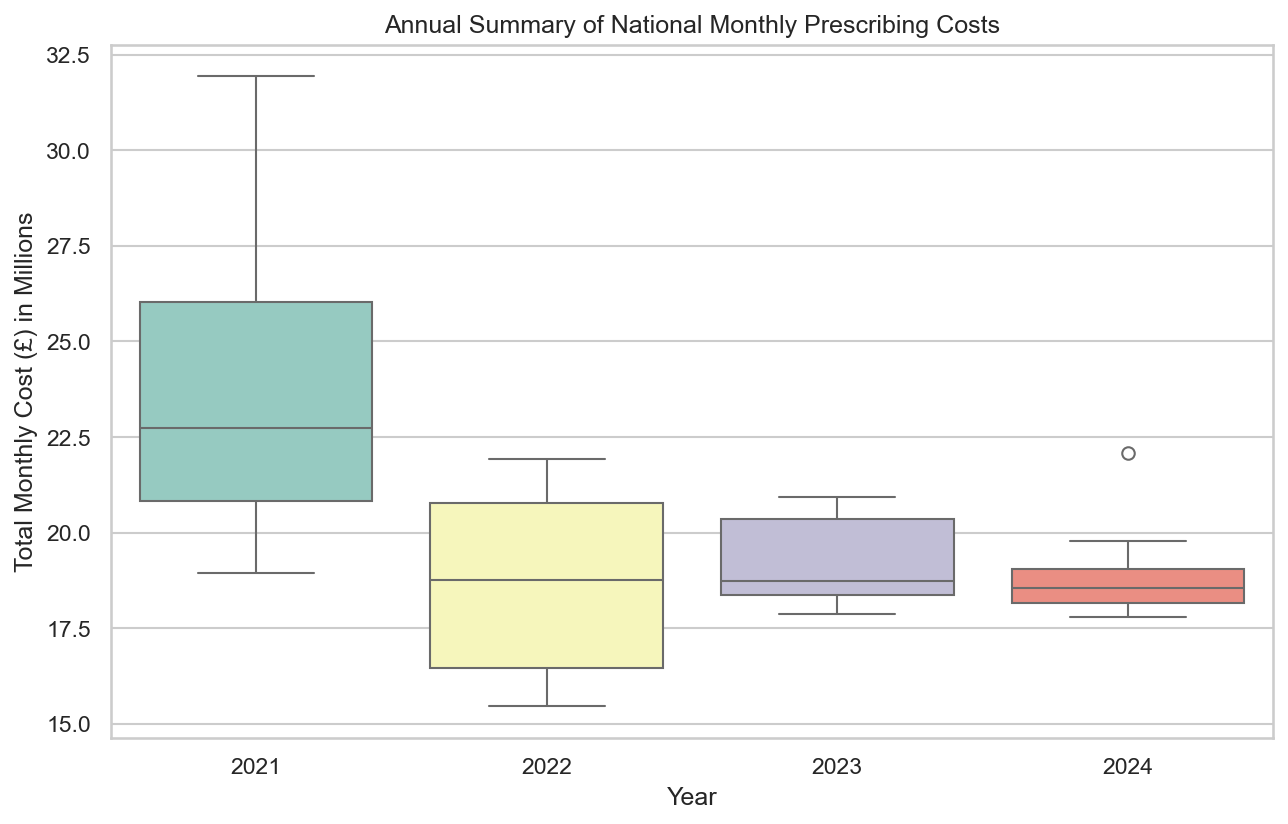

In [16]:
monthly_total_df = pca_regional_drug_summary_df.groupby(['YEAR'], as_index=False)['COST'].sum()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6),dpi = 150)
box_data['COST_M'] = box_data['COST'] / 1000000
sns.boxplot(data=box_data, x='YEAR', y='COST_M', palette="Set3", hue='YEAR', legend=False)

plt.title('Annual Summary of National Monthly Prescribing Costs')
plt.xlabel('Year')
plt.ylabel('Total Monthly Cost (£) in Millions')
plt.show()

In [17]:
#FINDING OUTLIER
data_2024 = box_data[box_data['YEAR'] == 2024]
Q1 = data_2024['COST'].quantile(0.25)
Q3 = data_2024['COST'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

outliers = data_2024[(data_2024['COST'] > upper_bound) | (data_2024['COST'] < lower_bound)]

print(f"outlier month in 2024：\n",outliers[['YEAR_MONTH', 'COST']])

outlier month in 2024：
     YEAR_MONTH         COST
42      202407  22071625.09


### Question 4: Calculate the annual *mean* monthly total national prescribing cost and display in a vertical barchart

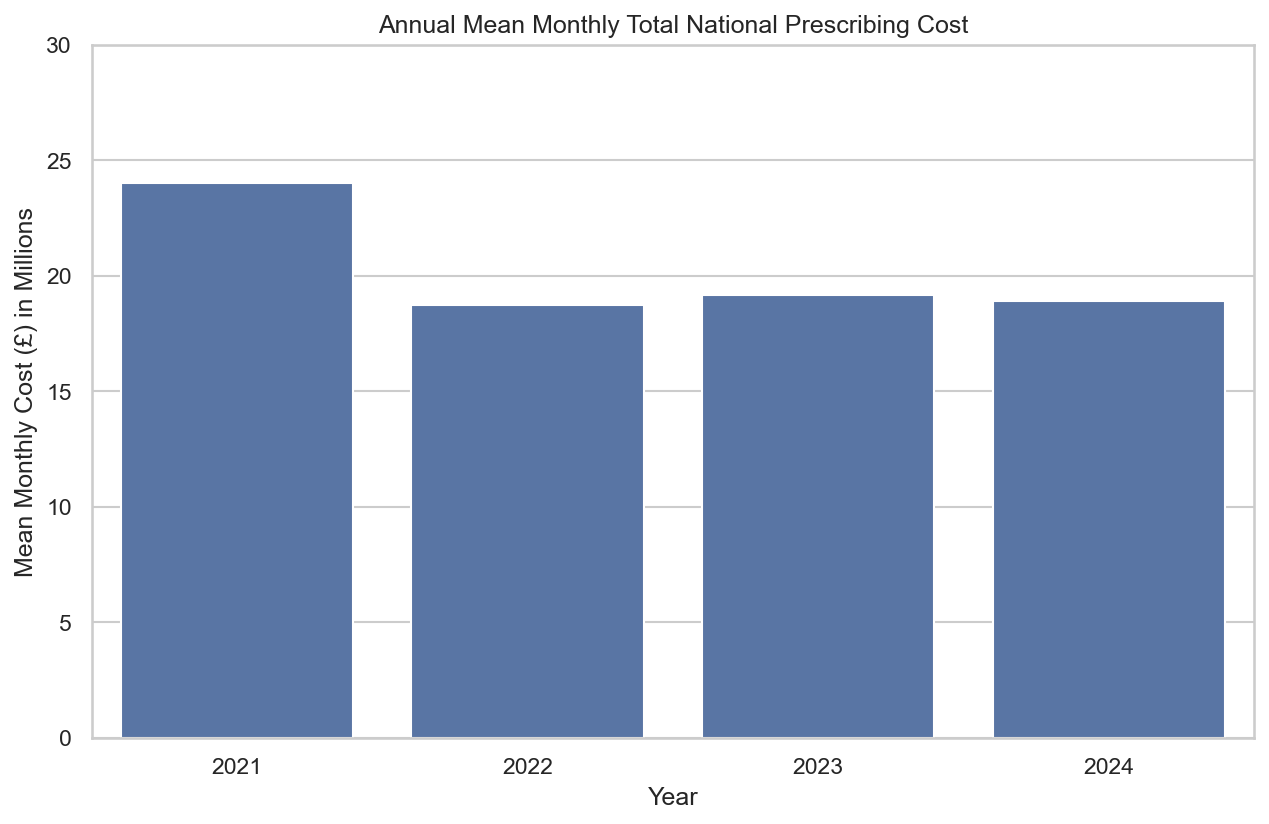

In [18]:
mean_cost = box_data.groupby('YEAR', as_index=False)['COST_M'].mean()

plt.figure(figsize=(10, 6),dpi = 150)
sns.barplot(data = mean_cost, x = 'YEAR', y = 'COST_M')
plt.ylim(0, 30)
plt.title('Annual Mean Monthly Total National Prescribing Cost')
plt.xlabel('Year')
plt.ylabel('Mean Monthly Cost (£) in Millions')
plt.show()

### Question 5: Create a (pivoted) table that shows the cost of anti-depressant prescribing per region per year?
#### Note: Each row should be a year and each column should be a region.

In [19]:
q5_pivot = pca_regional_drug_summary_df.pivot_table(
    index='YEAR',
    columns='REGION_NAME',
    values='COST',
    aggfunc='sum'
)

# customised
styled_table = q5_pivot.style \
    .format("£{:,.2f}") \
    .background_gradient(cmap='YlGnBu') \
    .set_caption("Table 1: Annual Prescribing Cost by Region (£)") \
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#4b8bbe'), ('color', 'white'), ('font-weight', 'bold')]
    }])

styled_table

REGION_NAME,EAST OF ENGLAND,LONDON,MIDLANDS,NORTH EAST AND YORKSHIRE,NORTH WEST,SOUTH EAST,SOUTH WEST
YEAR,,,,,,,
2021,"£32,549,420.30","£31,640,433.44","£54,008,266.51","£54,219,524.21","£41,951,035.20","£44,230,470.23","£29,500,099.95"
2022,"£25,646,510.64","£25,262,950.79","£42,218,785.19","£41,628,529.09","£31,645,816.96","£35,263,810.74","£22,982,042.81"
2023,"£26,095,459.16","£26,264,853.62","£43,734,608.81","£43,117,423.36","£32,223,271.81","£35,320,634.97","£23,257,408.13"
2024,"£21,556,935.59","£21,338,156.62","£36,140,498.75","£36,540,048.99","£26,356,567.72","£28,686,310.67","£18,570,411.15"


# Report Task

You are a Public Health Analyst and you have been asked to write a report.
This report will describe and analyse antidepressant prescribing, looking at volume and cost, both nationally and regionally.
The title of this report is 'Longitudinal Analysis of Antidepressant Prescribing'.
Longitudinal just means the analysis is over an extended period of time, which we have with 4 years of monthly data.
The report is to be split into two sections:

Part One: To set the context for the report, this will be overall national and regional figures

Part Two: The will be followed-up by a more exploratory analysis that delves into antidepressant prescribing cost trends.

Part Two Extension: Those attempting the extension task can then look at creating standardised metrics to understand more specific prescribing patterns.






## Part One

Part One is a directed analysis and the same content needs to be covered by both streams.
These required content for Part One is:

1.  Create two vertical bar charts for comparison.
    First, create a bar chart showing the total annual antidepressant prescribing (items).
    Second, create a bar chart that shows the total antidepressant prescribing cost.
    Describe the trend of each chart and compare the charts against each other.

2.  Create two tables for comparison.
    First, create a table showing the total annual antidepressant prescribing per region (items).
    Second, create a table showing the annual antidepressant prescribing cost per region.
    Describe some regional changes and contrasts between 2021 and 2024.

3.  By now you may have noticed there are contrasts between antidepressant prescribing volumes and costs.
    Next, we will create two horizontal bar charts for comparison.
    First, create an [ordered bar chart](https://service-manual.ons.gov.uk/data-visualisation/guidance/ordering-in-charts#:~:text=When%20showing%20the%20categories%20in%20a%20chart%2C%20for,bar%20chart%2C%20sort%20the%20categories%20by%20their%20value.) showing the 10 most prescribed antidepressants across the four years (items).
    Second, create an [ordered bar chart](https://service-manual.ons.gov.uk/data-visualisation/guidance/ordering-in-charts#:~:text=When%20showing%20the%20categories%20in%20a%20chart%2C%20for,bar%20chart%2C%20sort%20the%20categories%20by%20their%20value.) that shows antidepressants with the greatest total prescribing cost across the entire four year period..
    Highlight and describe any differences between the charts.

Try and make text between sections flow, so the report reads well.
The findings from part one may inform how you approach part two.

In [20]:
import warnings
warnings.filterwarnings('ignore')

#Longitudinal Analysis of Antidepressant Prescribing


###There is a highly concentrated prescribing landscape within the NHS from 2021 to 2025. Sertraline hydrochloride is the clear market leader, with a total volume exceeding 80 million items over the four-year period. This underscores its role as the primary first-line treatment for depression and anxiety disorders in national clinical guidelines.

####The "Core Four" Medications The vast majority of the volume is driven by four key substances:
1. Sertraline hydrochloride: >85M items.
2. Amitriptyline hydrochloride: ~60M items.
3. Citalopram hydrobromide: ~53M items.
4. Mirtazapine: ~46M items.

The high volume of Amitriptyline, a tricyclic antidepressant (TCA), likely reflects its dual use in clinical practice for both mental health and chronic pain management.

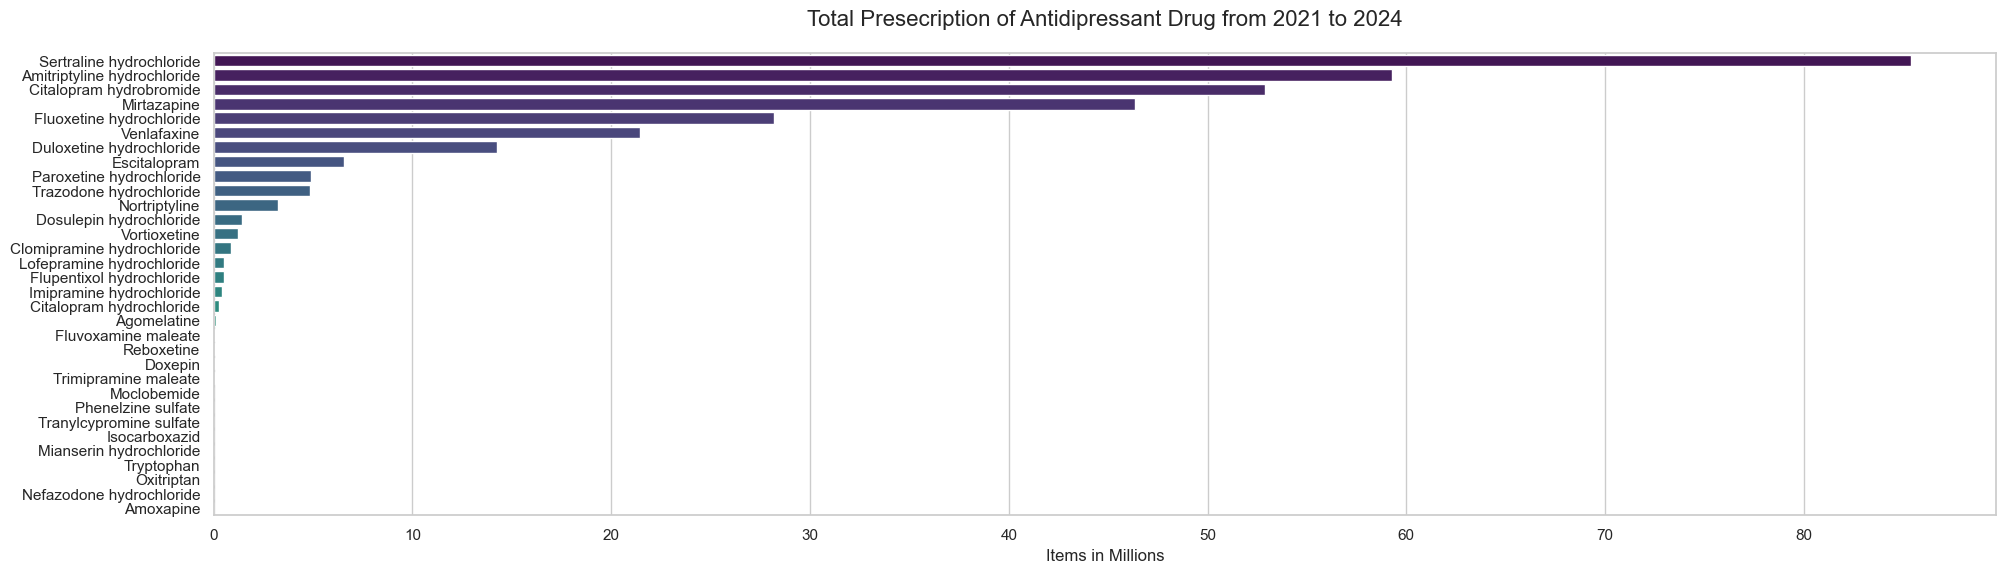

In [21]:
summary1 = pca_regional_drug_summary_df.groupby(['BNF_CHEMICAL_SUBSTANCE'],as_index=False)['ITEMS'].sum().sort_values(by='ITEMS', ascending=False)
summary1['ITEMS_M'] = summary1['ITEMS'] / 1_000_000
plt.figure(figsize = (23,6))
sns.barplot(
    data=summary1,
    x='ITEMS_M',
    y='BNF_CHEMICAL_SUBSTANCE',
    palette='viridis'
);

plt.title('Total Presecription of Antidipressant Drug from 2021 to 2024', fontsize=16, pad=20)
plt.xlabel('Items in Millions', fontsize=12)
plt.ylabel('')
plt.show()

###The longitudinal data indicates a significant geographical disparity in antidepressant prescribing across England. While national trends show stabilization, prescribing intensity is heavily concentrated in the North, with the North East and Yorkshire region recording the highest volume at 72.1 million items—more than double that of the South West (32.3 million). This suggests that mental health interventions and resource allocation should be prioritized based on regional socio-economic demand rather than population density alone.

####Regional Disparity and High-Intensity Clusters

*  Northern Dominance: The North East and Yorkshire and Midlands represent the two largest prescribing clusters, totaling over 134 million items combined.
*  London Anomaly: Despite being the most populous metropolitan hub, London ranks remarkably low (35.9M items), suggesting either lower prevalence of recorded depression or a higher reliance on non-pharmacological therapies (e.g., talk therapy) in the capital or other lifestyle attributes.

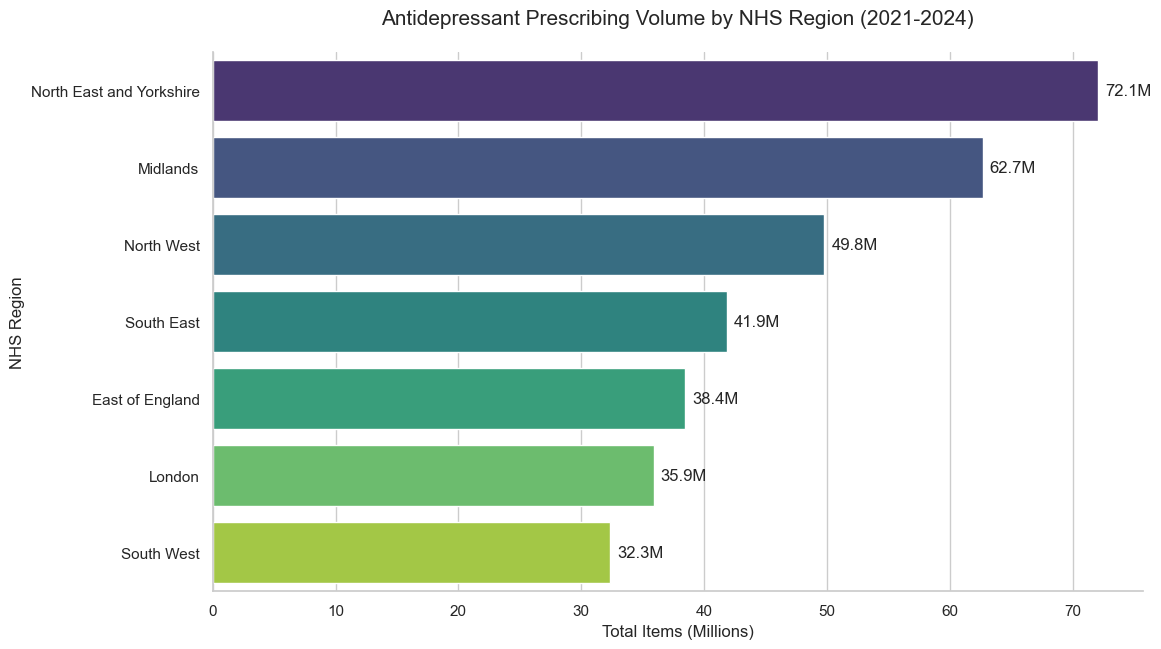

In [22]:
#data
summary2 = pca_regional_drug_summary_df.groupby(['REGION_NAME'],as_index=False)['ITEMS'].sum().sort_values(by='ITEMS', ascending=False)
summary2['ITEMS_M'] = summary2['ITEMS'] / 1_000_000
summary2['REGION_NAME_CLEAN'] = summary2['REGION_NAME'].str.title().replace({'And': 'and', 'Of': 'of'}, regex=True)

#plot
plt.figure(figsize=(12, 7))

norm = plt.Normalize(summary2['ITEMS_M'].min(), summary2['ITEMS_M'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)

ax = sns.barplot(
    data=summary2.sort_values('ITEMS_M', ascending=False),
    x='ITEMS_M',
    y='REGION_NAME_CLEAN',
    palette='viridis'
)

for p in ax.patches:
    ax.annotate(f'{p.get_width():.1f}M',
                (p.get_width(), p.get_y() + p.get_height()/2),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.title('Antidepressant Prescribing Volume by NHS Region (2021-2024)', fontsize=15, pad=20)
plt.xlabel('Total Items (Millions)', fontsize=12)
plt.ylabel('NHS Region', fontsize=12)
sns.despine()

## Part Two (Longitudinal Analysis)

Now you have a good understanding around national and regional antidepressant prescribing volume and cost trends.
You will be given various topics or points to explore, and you will decide what approach or charts best does this.
To supplement the initial analysis, you will now:

-   Look at the longitudinal (monthly) trend for all antidepressant items and for the cost of antidepressant prescribing
-   Then, explore the data and find the antidepressant drugs that are driving these monthly item and cost trends.
-   Then give a high-level summary to your work and findings.


## Exploratory Data Analysis (EDA) Framework

### 1. Regional Disparity & The "Under-reporting" Hypothesis
* **Access to Healthcare**: Is there a positive correlation between the density of General Practitioners (GPs) per capita and prescribing volumes across London boroughs? A lower prescription count may simply reflect limited primary care accessibility.
* **Demographic Bias**: As a major global hub, London possesses a significantly younger population compared to the aging demographics of Northern England. Do the help-seeking behaviors and clinical needs of these younger cohorts fundamentally differ from those in high-volume regions?
* **Stigma & Undiagnosed Rates**: By integrating external datasets, we can analyze the ratio of "Self-reported Psychological Distress" to "Actual Prescriptions Issued." Is this ratio significantly lower in London, indicating a potential gap in diagnosis rather than a lower prevalence of illness?

### 2. Cost vs. Volume Dynamics
* **Price Per Item Analysis**: Despite a lower total volume, is the **Cost per Item** significantly higher in London? This would investigate whether clinicians in the capital favor expensive branded medications over more cost-effective generic alternatives.
* **Efficiency Mapping**: Which specific regions achieve "High Coverage at Low Cost"? Identifying these clusters can provide benchmarks for national prescribing efficiency.

### 3. Anomalies & Temporal Trends
* **The July 2024 Expenditure Spike**: Was the significant expenditure increase in July 2024 a nationwide phenomenon, or was it driven by localized price volatility within specific regions like London?
* **Long-term Growth Trajectories**: Has the growth rate of antidepressant prescriptions remained consistent across all regions over the four-year period, or have certain areas experienced "explosive" growth that requires intervention?

### 4. Specific Prescribing Patterns
* **Drug Choice Consistency**: Does the preference ratio between SSRIs (e.g., Sertraline) and TCAs (e.g., Amitriptyline) vary significantly by geography?
* **Substitution Patterns**: When the cost of a primary first-line medication increases, is there a measurable difference in the speed at which different regions transition to second-line alternatives?

## Due to the limited amount of data, not all issues can be investigated.

###Despite a lower total prescription, is the Cost per Item significantly higher in London?


Despite London having a lower total prescription volume compared to many other regions, the Cost per Item in London is not significantly higher.In contrast, the South East region displays a distinct pricing anomaly. Across the entire antidepressant substance profile, the South East consistently maintains a higher mean drug price. This is most evident in the unit costs for Fluoxetine hydrochloride and Sertraline hydrochloride, where the South East records the highest regional prices at £3.39 and £2.78 per item, respectively.


In [23]:
target_drugs = [
    'Sertraline hydrochloride',
    'Amitriptyline hydrochloride',
    'Citalopram hydrobromide',
    'Mirtazapine',
    'Fluoxetine hydrochloride'
]

mean_price_data = pca_regional_drug_summary_df[
    pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'].isin(target_drugs)
].groupby(['BNF_CHEMICAL_SUBSTANCE', 'REGION_NAME'], as_index=False)[['ITEMS', 'COST']].sum()
mean_price_data['cost_per_item'] = mean_price_data['COST'] / mean_price_data['ITEMS']

mean_price_data


,BNF_CHEMICAL_SUBSTANCE,REGION_NAME,ITEMS,COST,cost_per_item
0,Amitriptyline hydrochloride,EAST OF ENGLAND,7273484,11109132.17,1.527347
1,Amitriptyline hydrochloride,LONDON,5887758,8422083.05,1.430440
2,Amitriptyline hydrochloride,MIDLANDS,11716882,18434238.82,1.573306
3,Amitriptyline hydrochloride,NORTH EAST AND YORKSHIRE,13240416,19492933.12,1.472230
4,Amitriptyline hydrochloride,NORTH WEST,7937992,12310600.34,1.550846
5,Amitriptyline hydrochloride,SOUTH EAST,6937939,12370532.84,1.783027
6,Amitriptyline hydrochloride,SOUTH WEST,6278466,10599993.65,1.688309
7,Citalopram hydrobromide,EAST OF ENGLAND,7270353,9709127.52,1.335441
8,Citalopram hydrobromide,LONDON,5790121,8306666.45,1.434627
9,Citalopram hydrobromide,MIDLANDS,10240761,14743316.34,1.439670


In [24]:
import plotly.express as px

heatmap_df = mean_price_data.pivot(index='BNF_CHEMICAL_SUBSTANCE', columns='REGION_NAME', values='cost_per_item')

fig = px.imshow(
    heatmap_df,
    labels=dict(x="NHS Region", y="Drug Name", color="Price per Item (£)"),
    x=heatmap_df.columns,
    y=heatmap_df.index,
    color_continuous_scale='Reds',
    title='<b>Heatmap: Average Drug Price by Region and Substance</b>'
)

fig.update_layout(xaxis_tickangle=-45,
                  width=1000)
fig.show()